### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [5]:
min_qubits=2
max_qubits=8
max_circuits=3
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # *** Use these lines when running on hardware backend, to limit use of resources
min_qubits=4
max_qubits=6
max_circuits=3
num_shots=1000

MaxCut Benchmark Program - Qiskit
... execution starting at 2022-01-06 05:41:54
************
Executing [3] circuits with num_qubits = 4
  ... i=3 s_int=3
  ... i=4 s_int=4
  ... problem 004 not found, limiting to 1 circuit(s).
For secret int 3 measured: {'1111': 96, '0110': 113, '1100': 93, '0011': 98, '0000': 69, '0100': 39, '0111': 36, '1001': 94, '0010': 29, '1010': 90, '0101': 96, '1000': 30, '1011': 33, '1110': 25, '0001': 33, '1101': 26}
ERROR: failed to execute result_handler for circuit 4 3
... exception = '01'
************
Average Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Transpiled Depth, ξ (xi) for the 4 qubit group = 41, 0.462
Average Creation Time for the 4 qubit group = 0.001 secs
Average Elapsed Time for the 4 qubit group = 0.046 secs
Average Execution Time for the 4 qubit group = 0.003 secs
Average Fidelity for the 4 qubit group = 0.0

************
Executing [3] circuits with num_qubits = 6
  ... i=3 s_int=3
  ... i=4 s_int=4
  ... i=5 s_int=5
  ... i=6 s_in

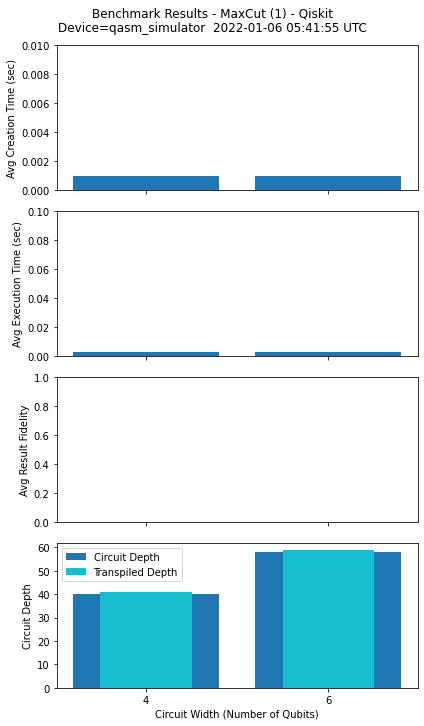

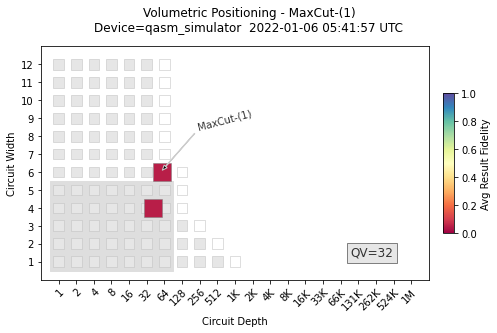

In [6]:
#%run bernstein-vazirani/qiskit/maxcut_benchmark.py
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

maxcut_benchmark.verbose=True

maxcut_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

In [ ]:
from qiskit.visualization import plot_histogram

# Get the counts, the frequency of each answer
counts = maxcut_benchmark.saved_result.get_counts()

# Display the results
plot_histogram(counts)

In [ ]:
maxcut_benchmark.QC_.draw('mpl',scale=1)
#print(circuit)